# Import Modules

In [241]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras.datasets.mnist
%matplotlib inline

print(tf.__version__)

1.10.0


# Import Data

In [231]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [232]:
X_train, X_test = X_train/255.0, X_test/255.0

In [233]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [234]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

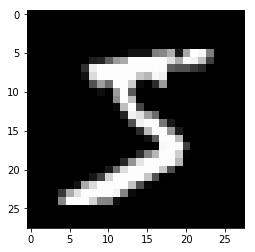

In [235]:
plt.imshow(X_train[0], cmap='gray')

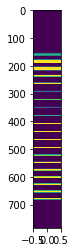

In [236]:
plt.imshow(X_train[0].reshape([784,1]), aspect=0.01)

# DNN Classification

In [242]:
#parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
n_classes = 10
n_samples = 20
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_output = 10

In [243]:
def init_weight(shape):
    init_weight = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_weight)

In [244]:
def init_bias(shape):
    init_bias = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias)

In [245]:
#input layer
input_x = tf.placeholder(dtype=tf.float32, shape=[None, 784])

In [246]:
#hidden Layer 1
hidden_1 = tf.add(tf.matmul(input_x, init_weight([n_input, n_hidden_1])), init_bias([n_hidden_1]))

In [247]:
#hidden layer 2
hidden_2 = tf.add(tf.matmul(hidden_1, init_weight([n_hidden_1, n_hidden_2])), init_bias([n_hidden_2]))

In [248]:
#output Layer
y_pred = tf.add(tf.matmul(hidden_2, init_weight([n_hidden_2, n_output])), init_bias([n_output]))

In [249]:
def onehot(arr):
    d = []
    for i in arr:
        dummy = np.zeros(10)
        dummy[i] = 1
        d.append(dummy)
    return np.array(d)

In [250]:
#one hot encoding
onehot_y_train = onehot(y_train)
onehot_y_test = onehot(y_test)

In [251]:
#y_true
y_true = tf.placeholder(dtype=tf.float32, shape=[None, 10])

In [252]:
#Cross Entropy
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y_pred))

In [253]:
#Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

In [254]:
train = optimizer.minimize(cross_entropy)

In [255]:
#init variables
n_epoch = 20
init = tf.global_variables_initializer()

In [256]:
with tf.Session() as sess:
    sess.run(init)
    
    #num of epoch
    for e in range(n_epoch):
        steps = int(X_train.shape[0]/batch_size)
        
        for i in range(steps):
            sess.run(train, feed_dict={input_x:X_train[i*batch_size: i*batch_size + batch_size].reshape([-1, 784]), 
                                       y_true:onehot_y_train[i*batch_size: i*batch_size + batch_size]})
        
        #Evaluation:
        matches = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
        acc = tf.reduce_mean(tf.cast(matches, tf.float32))
        print('accuracy after {} epoch: '.format(e), sess.run(acc, feed_dict={input_x:X_test.reshape([-1, 784]), y_true:onehot_y_test}))

accuracy after 0 epoch:  0.8941
accuracy after 1 epoch:  0.8992
accuracy after 2 epoch:  0.9026
accuracy after 3 epoch:  0.9017
accuracy after 4 epoch:  0.9027
accuracy after 5 epoch:  0.9035
accuracy after 6 epoch:  0.9042
accuracy after 7 epoch:  0.905
accuracy after 8 epoch:  0.9062
accuracy after 9 epoch:  0.9057
accuracy after 10 epoch:  0.9053
accuracy after 11 epoch:  0.904
accuracy after 12 epoch:  0.9046
accuracy after 13 epoch:  0.9051
accuracy after 14 epoch:  0.9057
accuracy after 15 epoch:  0.9061
accuracy after 16 epoch:  0.9065
accuracy after 17 epoch:  0.9059
accuracy after 18 epoch:  0.906
accuracy after 19 epoch:  0.9062
